In [4]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import os

In [5]:
def import_power(file_path):    
    with open(file_path) as fp:
        data = [list(map(float, line.strip().split(' '))) for line in fp]
        return np.array(data)
    # 1. iterate over file line-by-line
    # 2. strip line of newline symbols
    # 3. split line by spaces into list (of number strings)
    # 4. convert number substrings to int values
    # 5. convert map object to list
        

In [6]:
filepath = os.getcwd()+'/2A/power.txt'
power = import_power(filepath)


In [42]:
table = PrettyTable()

if '2A' in filepath:
    
    
    dat = power.copy()[1:9,1:9]   
    for i in range(0,dat.shape[0]):
       for j in range(0,dat.shape[1]):
          dat[i,j] = dat[i,j] if j <= i else 0 

    idx_fuel_cells = np.argwhere(dat>0)
    nnz_fuel_cells = len(idx_fuel_cells)
    dat /= np.sum(dat)
    dat *= nnz_fuel_cells
else:
    dat = power.copy()
    idx_fuel_cells = np.argwhere(power>0)
    nnz_fuel_cells = len(idx_fuel_cells)

    dat[4,:] *= 1
    dat[:,4] *= 1
    for i in range(0,dat.shape[0]):
        for j in range(0,dat.shape[1]):
            dat[i,j] = dat[i,j] if j <= i else 0 
    dat = dat[5:-3,5:-3]
    
    idx_fuel_cells = np.argwhere(dat>0)
    nnz_fuel_cells = len(idx_fuel_cells)      
    dat /= np.sum(dat)
    dat *= nnz_fuel_cells
    
    
    



#data_list = np.flip(dat, 1).tolist()
#data_list = dat.transpose().tolist()
data_list = dat.tolist()
n_list = [str(n) for n in range(1, len(data_list)+1)]
table.field_names = n_list

for row in data_list:
    # Format each value to 2 decimal places
    formatted_row = [f"{x:.6g}" for x in row]
    table.add_row(formatted_row)

print(table)

+----------+----------+---------+----------+----------+---------+----------+---+
|    1     |    2     |    3    |    4     |    5     |    6    |    7     | 8 |
+----------+----------+---------+----------+----------+---------+----------+---+
| 0.932956 |    0     |    0    |    0     |    0     |    0    |    0     | 0 |
| 0.93149  | 0.949176 |    0    |    0     |    0     |    0    |    0     | 0 |
| 0.940826 | 0.955022 |    0    |    0     |    0     |    0    |    0     | 0 |
| 0.96118  | 0.970357 | 1.03603 | 1.12609  |    0     |    0    |    0     | 0 |
| 0.96097  |    0     | 1.04007 | 1.00296  |    0     |    0    |    0     | 0 |
| 0.970932 | 1.01866  |  1.0696 | 0.994412 | 1.03791  | 1.07894 |    0     | 0 |
| 0.989861 | 0.977644 | 0.98604 | 1.03597  | 0.993691 | 0.99463 | 1.03696  | 0 |
| 0.966728 |    0     | 1.02477 | 0.98995  |    0     | 1.03224 | 0.993946 | 0 |
+----------+----------+---------+----------+----------+---------+----------+---+


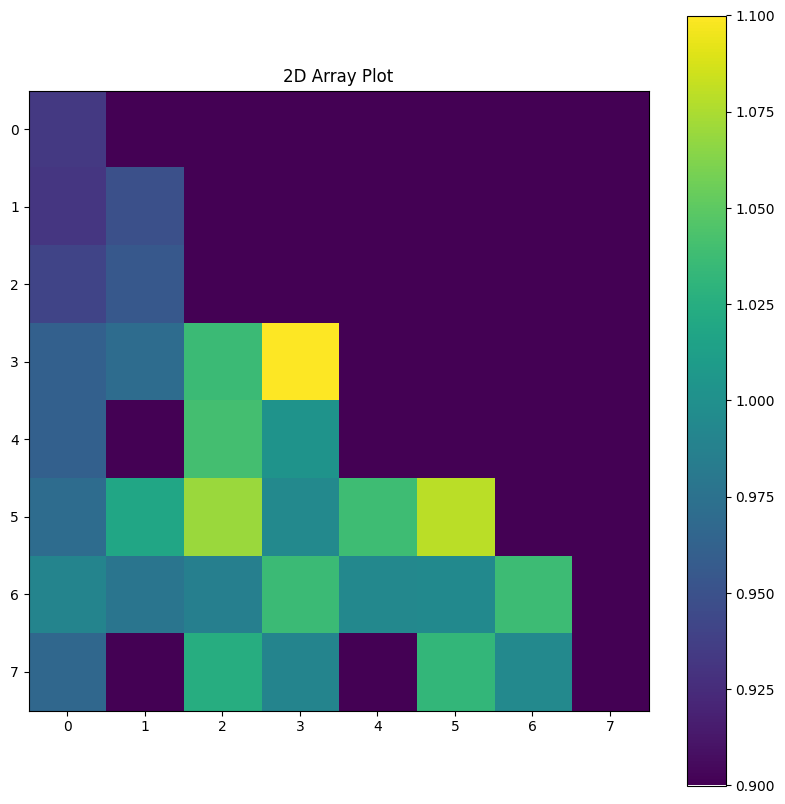

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(dat, cmap='viridis')  # You can change the colormap if desired
plt.title('2D Array Plot')
plt.colorbar()  # Adds a colorbar to show the scale
plt.clim([0.9,1.1])
plt.show()